## Linear Regression

In this notebook, we will provide code for:

1. Running linear regression from scratch.
2. Evaluating model performance (computing mean squared error and $R^2$).
3. Provide 

In [1]:
import numpy as np
import time

# We first set the random seed for reproducibility 
SEED = 17
np.random.seed(SEED)

# Let us first sample n points in 1 dimension 
d = 1
n = 7

X_train = np.random.uniform(size=(n, d))  # Sampling points on interval [0, 1] uniformly

# Let us then generate a random linear function 
w = np.random.uniform(size=(d, 1))

# We can then generate the targets according to y = X w + e where e is a small amount of noise
eps = np.random.normal(size=(n, 1)) * .1
y_train = X_train @ w + eps

# We will also generate some non-noisy test samples to measure performance of our model
n_test = 1000
X_test = np.random.uniform(size=(n_test, d))
y_test = X_test @ w

We will visualize the data below (visualizations are often key to identifying patterns in ML problems).  

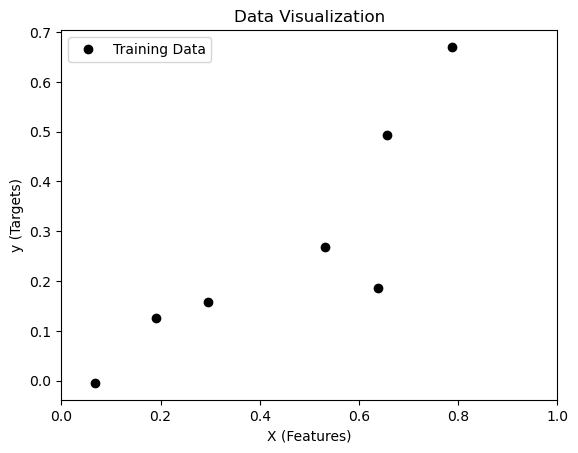

In [2]:
import matplotlib.pyplot as plt

plt.plot(X_train.reshape(-1), y_train.reshape(-1), 'ko', label='Training Data')
plt.xlim(0, 1)
plt.title("Data Visualization")
plt.xlabel("X (Features)")
plt.ylabel("y (Targets)")
plt.legend()
plt.show()

In the above, we generally see that as the feature $X$ increases, so does the target $y$.  Let us see how well a line fits this data. To find a line of best fit, we will find a minimum norm solution to the objective $\| y - Xw \|_2^2$. 

Recall that the minimum norm solution is given by the Moore-Penrose inverse $\hat{w} = X^{\dagger} y$.  To compute $X^{\dagger}$, we can simply use the corresponding function ```pinv```. 

In [59]:
from numpy.linalg import pinv 

start = time.time()
alpha = pinv(X_train) @ y_train  # We just found a line of best fit.  
end = time.time()
print("We solved linear regression in " + str(end - start) + " seconds.")

We solved linear regression in 0.0004279613494873047 seconds.


Let us now visualize how well our new line approximates the above data.  

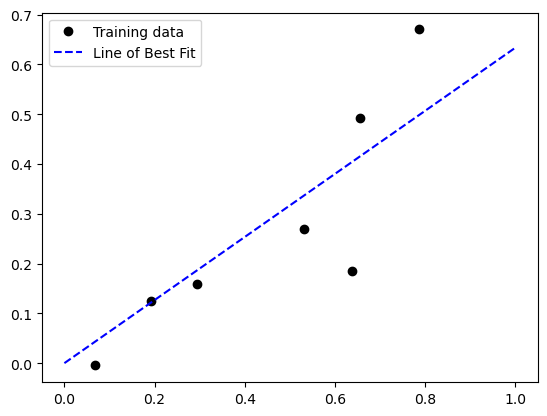

In [60]:
# We first need to make some test data so that we can sample points on this line.

X_grid = np.linspace(0, 1, num=1000).reshape(-1, 1)  # Samples 1000 evenly spaced points  on [0, 1].
preds = X_grid @ alpha 

plt.plot(X_train.reshape(-1), y_train.reshape(-1), 'ko', label='Training data')  # Plotting original data
plt.plot(X_grid.reshape(-1), preds.reshape(-1), 'b--', label='Line of Best Fit')  # Plotting line of best fit
plt.legend()
plt.show()

How does this line of best fit perform on our test data? Let's visualize it and measure it according to a few metrics.

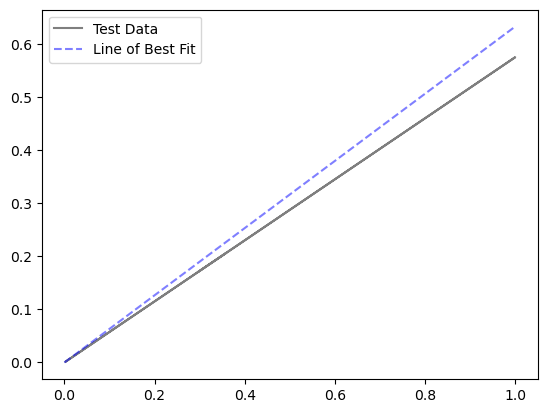

In [61]:
plt.plot(X_test.reshape(-1), y_test.reshape(-1), 'k-', alpha=.5, label='Test Data')
plt.plot(X_grid.reshape(-1), preds.reshape(-1), 'b--', alpha=.5, label='Line of Best Fit')  # Plotting line of best fit
plt.legend()
plt.show()

In [62]:
# Let us first measure performance according to mean squared error (MSE)

train_preds = X_train @ alpha
train_mse = np.mean(np.square(y_train - train_preds))
test_preds = X_test @ alpha
test_mse = np.mean(np.square(y_test - test_preds))
print("Train Error: ", train_mse, ", Test Error: ", test_mse)

Train Error:  0.012976409562516316 , Test Error:  0.0011140339060783137


The test error seems pretty low, but it is a bit hard to judge the scale.  We should try using another metric like $R^2$ to measure performance.  $R^2 \in (-\infty, 1]$ acts like a normalized version of MSE and values closer to 1 indicate good performance.


In [63]:
from sklearn.metrics import r2_score

# Be careful with the arguments to r2_score - it is not symmetric and needs r2_score(y_true, y_pred)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print("Train R2: ", train_r2, ", Test R2: ", test_r2)

Train R2:  0.7213091624394681 , Test R2:  0.9579663859645882


We can now see that we are getting $R^2$ values near 1, and so we have reasonable performance on this task.  Now that you have seen how to do lines of best fit in 1 dimension, try the following exercises: 

1.  Modify the code above to implement linear regression for a similar task in d=100 dimensions.  
2.  How do the train and test MSE and $R^2$ values vary as a function of number of training examples and noise? 
3.  In particular, see how performance changes as number of training samples $n$ grows larger while $d$ is fixed.  

Let's now compare how our linear regression solution above compares to using linear regression from a standard library (sklearn). 

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print("SKlearn solved linear regression in " + str(end - start) + " seconds.")

sk_train_pred = model.predict(X_train)
sk_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, sk_train_pred)
test_r2 = r2_score(y_test, sk_test_pred)
print("Train R2: ", train_r2, ", Test R2: ", test_r2)

SKlearn solved linear regression in 0.0011980533599853516 seconds.
Train R2:  0.7213091624394682 , Test R2:  0.9579663859645879
